<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Satisfaisabilit%C3%A9_(SAT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Satisfaisabilité**

Voici un exercice qui vous permettra de vous exercer sur la pratique d'optimisation.

Le problème satisfaisabilité traite une formule de logique propositionnelle constituée de variables logiques reliées par des connecteurs logiques : ET, OU, NON). Plus précisément, on analyse des formules de logique propositionnelles en forme normale conjonctive, c'est à dire sous la forme de produits de sommes (x V ¬z V y) Λ (¬y V k) Λ (¬k V ¬x).


Son objectif est de déterminer s'il existe une combinaison de valeurs pour les variables qui la composent qui rende la formule vraie.

Il en existe plusieurs variantes, suivant le nombre de nombre de littéraux par clause. Voici quelques exemples :

*   1-SAT : x Λ ¬y Λ z Λ ¬k
*   2-SAT : (x V ¬z) Λ (¬y V k) Λ (¬k V ¬x)
*   3-SAT : (x V y V z) Λ (k V ¬x V y) Λ (¬k V x V ¬y)
 

Le problème 3-SAT est un problème **NP-Complet** qui peut être étendu à toute formule en forme normale conjonctive, en montrant que n'importe quelle formule peut être réduite à un expression dont les clauses sont composées de 3 littéraux.

Le problème 2-SAT se résoud en **temps polynomial**, et est résolu en utilisant un graphe orienté où :

*   Les sommets sont les variables et leurs négations (x, ¬x)
*   Les arêtes sont les clauses (V)
Une formule est satisfaisable si, pour toutes les variables xᵢ, on a xᵢ et ¬xᵢ dans deux composantes connexes distinctes du graphe.

Le problème 1-SAT, ou **Horn-SAT**, se résoud également en **temps polynomial**. Nous allons voir ici comment avec un exemple concret, à partir de quelques propositions logiques :


1.   Si Mr White a un chien, alors Mme Brown a un chat
2.   Si Mr Green a un chien, alors il a aussi un chat
3.   Si Mr White a un chien et Mr Green a un chat, alors Mme Yellow a un chien
4.   Si Mme Brown et Mr Green ont un animal de la même espèce, alors Mr White a un chat
5.   Tous les hommes ont un chien

Soient les variables booléennes suivantes :
w, b, g, et y sont vraies si White, Brown, Green et Yellow ont un chien
W, B, G, et Y sont vraies si White, Brown, Green et Yellow ont un chat






In [2]:
p = ['w','b','g','y','W','B','G','Y']

Ces propositions peuvent être représentées sous la forme de formules logiques :

1.  w ⇒ B
2.  g ⇒ G
3.  (w Λ G) ⇒ y
4.  (g Λ b) ⇒ W Λ (G Λ B) ⇒ W)
5.  w Λ g

Ou bien :

w ⇒ B Λ g ⇒ G Λ (w Λ G) ⇒ y Λ (g Λ b) ⇒ W Λ (G Λ B) ⇒ W) Λ w Λ g

In [61]:
clauses = [(['w'], 'B'),(['g'], 'G'),(['w', 'G'], 'y'),(['g', 'b'], 'W'),(['G', 'B'], 'W'),([], 'w'),([], 'g')]

Voici une implémentation de Horn-SAT :


*   On débute par affecter la valeur False à chaque variable, dans un dictionnaire
*   On crée un ensemble de variables qui contient les variables impliquées quand l'impliquant n'est pas vide
*   Tant qu'il reste des valeures à traiter dans cet ensemble :

>* On supprime *v* une variable de l'ensemble

>* On passe la variable *v* à True dans le dictionnaire

>* Pour chaque clause *c* ayant *v* parmi ses impliquants :

>>* On supprime *v* des impliquants de la clause *c*

>>* S'il n'y a plus d'impliquants dans *c*, on ajoute la variables impliquée dans *c* à l'ensemble de variables à traiter , si elle n'y est pas déjà

* On retourne l'ensemble 





In [3]:
def HornSAT(p, cl):
  """
  Retourne les valeurs que doivent prendre chaque variable pour satisfaire l'expression logique caractérisée par les variables 'p' et les clauses 'cl'
  """
  valeurs = dict((v, False) for v in p)
  a_traiter = set(t[1] for t in cl if not len(t[0]))
  print('Les variables à traiter sont :',a_traiter)
  while a_traiter:
    v = a_traiter.pop()
    valeurs[v] = True
    c = [x for x in cl if v in x[0]]
    print('On traite la variable',v,', et on la supprime de la liste des variables à traiter qui est réduite à',a_traiter,'. Voici les impliquants contenant',v,':',c)
    for x in c:
      print("Dans l'implication",x,'on supprime',v,"de l'impliquant")
      x[0].remove(v)
      print('Et on obtient :',x)
      if not x[0]:
        a_traiter.add(x[1]) 
        print("Cet impliquant devient vide, on ajoute alors l'impliqué",x[1],"dans la liste des éléments à traiter :",a_traiter)
  return valeurs

clauses = [(['w'], 'B'),(['g'], 'G'),(['w', 'G'], 'y'),(['g', 'b'], 'W'),(['G', 'B'], 'W'),([], 'w'),([], 'g')]
print('Les valeurs finales sont :',HornSAT(p,clauses))

Les variables à traiter sont : {'w', 'g'}
On traite la variable w , et on la supprime de la liste des variables à traiter qui est réduite à {'g'} . Voici les impliquants contenant w : [(['w'], 'B'), (['w', 'G'], 'y')]
Dans l'implication (['w'], 'B') on supprime w de l'impliquant
Et on obtient : ([], 'B')
Cet impliquant devient vide, on ajoute alors l'impliqué B dans la liste des éléments à traiter : {'B', 'g'}
Dans l'implication (['w', 'G'], 'y') on supprime w de l'impliquant
Et on obtient : (['G'], 'y')
On traite la variable B , et on la supprime de la liste des variables à traiter qui est réduite à {'g'} . Voici les impliquants contenant B : [(['G', 'B'], 'W')]
Dans l'implication (['G', 'B'], 'W') on supprime B de l'impliquant
Et on obtient : (['G'], 'W')
On traite la variable g , et on la supprime de la liste des variables à traiter qui est réduite à set() . Voici les impliquants contenant g : [(['g'], 'G'), (['g', 'b'], 'W')]
Dans l'implication (['g'], 'G') on supprime g de l'impli

Les valeurs finales obtenues nous indiquent que : Mr White et Mr Green ont tous les deux un chien et un chat. Mme Brown a un chat et Mme Yellow a un chien. Il est possible que Mme Brown ait aussi un chien et que Mme Yellow ait aussi un chat.

Voici un module permettant de résoudre les problèmes CNF-SAT, c'est à dire tous les problèmes SAT sous forme normale conjonctive.

In [ ]:
from pysat.solvers import Glucose3

En cas d'erreur sur ce bloc d'instructions, lancez l'installation des modules matplotlib et networkx, redémarrez le noyau, puis re-exécutez la dernière cellule de code.


In [ ]:
import sys  
!{sys.executable} -m pip install --user PySAT

Dans PySAT, les variables sont représentées par des entiers : 1 correspond à x₁, et -1 à ¬x₁.

Voici un exemple d'expression à 2 littéraux à évaluer :

(¬x₁ V x₂) Λ (¬x₂ V x₃) 


In [15]:
g = Glucose3()
g.add_clause([-1, 2])
g.add_clause([-2, 3])
print(g.solve())
print(g.get_model())

True
[-1, -2]


Cette expression est satisfaisable si, par exemple, x₁ vaut False, x₂ vaut False, et x₃ vaut False.

Prenons une autre expression à 3 littéraux à évaluer :

(x₁ V x₂ V x₃) Λ (¬x₁ V ¬x₂ V x₃) Λ (x₁ V ¬x₂ V x₃) Λ (x₁ V x₂ V ¬x₃) Λ (¬x₁ V x₂ V ¬x₃) Λ (¬x₁ V ¬x₂ V ¬x₃) Λ (¬x₁ V x₂ V x₃) Λ (x₁ V ¬x₂ V ¬x₃) 

In [27]:
g = Glucose3()
g.add_clause([1, 2, 3])
g.add_clause([-1, -2, 3])
g.add_clause([1, -2, 3])
g.add_clause([1, 2, -3])
g.add_clause([-1, 2, -3])
g.add_clause([-1, -2, -3])
g.add_clause([-1, 2, 3])
g.add_clause([1, -2, -3])
print(g.solve())
print(g.get_model())

False
None


Ici, il n'y a aucune combinaison de valeurs de x₁, x₂, x₃ qui puisse rendre cette expression True.

Pour bien le comprendre, donnons un nom aux clauses et à l'expression :

a = (x₁ V x₂ V x₃)

b = (¬x₁ V ¬x₂ V x₃)

c = (x₁ V ¬x₂ V x₃)

d = (x₁ V x₂ V ¬x₃)

e = (¬x₁ V x₂ V ¬x₃)

f = (¬x₁ V ¬x₂ V ¬x₃)

g = (¬x₁ V x₂ V x₃)

h = (x₁ V ¬x₂ V ¬x₃) 

S = a Λ b Λ c Λ d Λ e Λ f Λ g Λ h

Examinons la table de vérité de S :
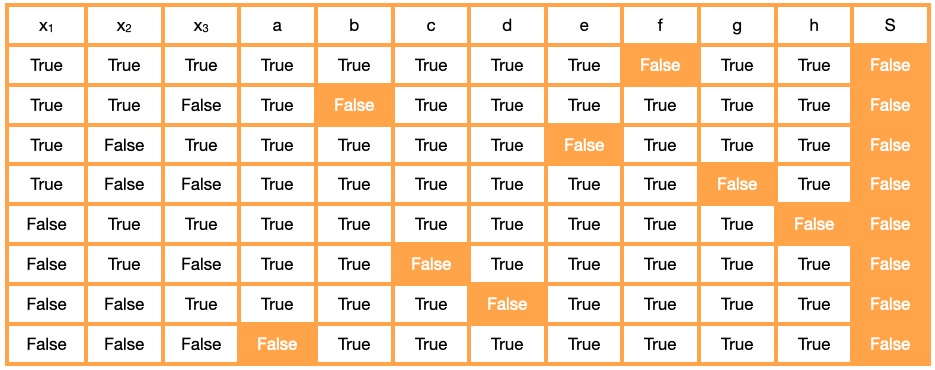

On constate que l'expression n'est pas satisfaisable : elle vaut False quelque soit la combinaison de valeurs de x₁, x₂, et x₃.